# Free Music Archive

[The Free Music Archive](https://github.com/mdeff/fma) contains metadata and 30 second clips of over 100,000 tracks.

In [1]:
import sqlite3
import numpy as np
import os
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

/usr/local/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# # Import FMA specific utilities
# import importlib.util
# spec = importlib.util.spec_from_file_location("utils", "/Users/ryanswan/code/fma/utils.py")
# fma = importlib.util.module_from_spec(spec)
# spec.loader.exec_module(fma)

## EDA

### Tracks

The tracks table is the unifying feature set for the FMA. It provides details about track length, artist location, and various other relevant information.

In [3]:
# test = fma.load('~/Downloads/fma_metadata/tracks.csv') Throws error for some reason - need to investigate

In [5]:
# Tracks table
tracks = pd.read_csv('../data/raw/fma_metadata/tracks.csv', index_col=0, header=[0,1])

In [8]:
print(tracks.shape)

(106574, 52)


In [9]:
print(tracks.columns)

MultiIndex([( 'album',          'comments'),
            ( 'album',      'date_created'),
            ( 'album',     'date_released'),
            ( 'album',          'engineer'),
            ( 'album',         'favorites'),
            ( 'album',                'id'),
            ( 'album',       'information'),
            ( 'album',           'listens'),
            ( 'album',          'producer'),
            ( 'album',              'tags'),
            ( 'album',             'title'),
            ( 'album',            'tracks'),
            ( 'album',              'type'),
            ('artist', 'active_year_begin'),
            ('artist',   'active_year_end'),
            ('artist', 'associated_labels'),
            ('artist',               'bio'),
            ('artist',          'comments'),
            ('artist',      'date_created'),
            ('artist',         'favorites'),
            ('artist',                'id'),
            ('artist',          'latitude'),
          

In [10]:
print(tracks.head())

            album                                                     \
         comments         date_created        date_released engineer   
track_id                                                               
2               0  2008-11-26 01:44:45  2009-01-05 00:00:00      NaN   
3               0  2008-11-26 01:44:45  2009-01-05 00:00:00      NaN   
5               0  2008-11-26 01:44:45  2009-01-05 00:00:00      NaN   
10              0  2008-11-26 01:45:08  2008-02-06 00:00:00      NaN   
20              0  2008-11-26 01:45:05  2009-01-06 00:00:00      NaN   

                                                                          \
         favorites id                                information listens   
track_id                                                                   
2                4  1                                    <p></p>    6073   
3                4  1                                    <p></p>    6073   
5                4  1                      

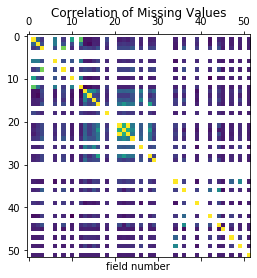

In [11]:
na_grid = tracks.applymap(pd.isna)
plt.matshow(na_grid.corr())
plt.xlabel('field number')
plt.title('Correlation of Missing Values')
plt.show()

In [12]:
row_na = na_grid.apply(sum, axis=1)

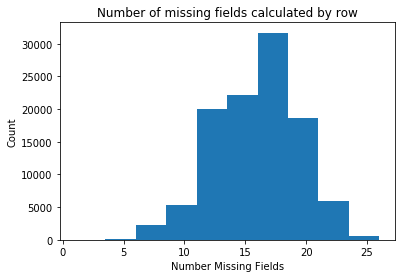

In [13]:
plt.hist(row_na)
plt.xlabel('Number Missing Fields')
plt.ylabel('Count')
plt.title('Number of missing fields calculated by row')
plt.show()

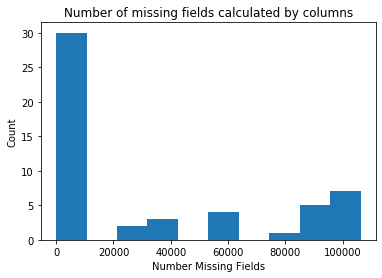

In [14]:
col_na = na_grid.apply(sum, axis=0)
plt.hist(col_na)
plt.xlabel('Number Missing Fields')
plt.ylabel('Count')
plt.title('Number of missing fields calculated by columns')
plt.show()

In [15]:
# Define class to produce these plots reliably
class NaAnalysis:
    def __init__(self, df):
        self.na_grid = df.applymap(pd.isna)
        self.row_na = self.na_grid.apply(sum, axis=1)
        self.col_na = self.na_grid.apply(sum, axis=0)
    def corr_plot(self):
        # Correlation plot
        plt.matshow(self.na_grid.corr())
        plt.xlabel('field number')
        plt.title('Correlation of Missing Values')
        plt.show()
    def row_plot(self):
        # Row Histogram
        plt.hist(self.row_na)
        plt.xlabel('Number Missing Fields')
        plt.ylabel('Count')
        plt.title('Number of missing fields calculated by row')
        plt.show()
    def col_plot(self):
        # Col Histogram
        plt.hist(self.col_na)
        plt.xlabel('Number Missing Fields')
        plt.ylabel('Count')
        plt.title('Number of missing fields calculated by columns')
        plt.show()
    def run_analysis(self):
        self.corr_plot()
        self.row_plot()
        self.col_plot()

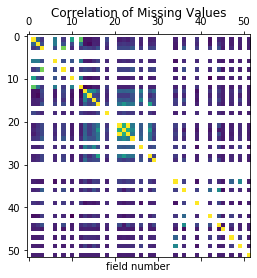

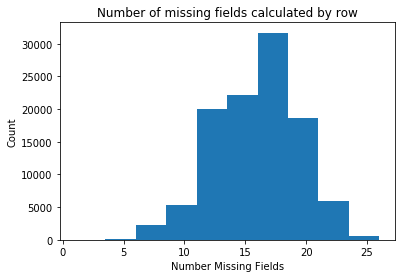

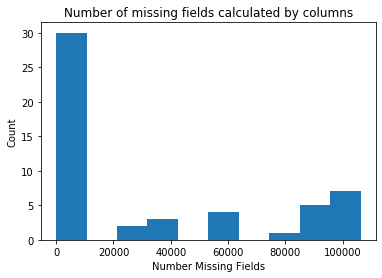

In [16]:
tracks_na = NaAnalysis(tracks)
tracks_na.run_analysis()

In [17]:
# Get percentage of null values in each field
n_null = tracks.isnull().sum() / len(tracks)
high_miss = n_null[n_null > 0.20]
print(high_miss)

album   date_released        0.340421
        engineer             0.856485
        information          0.219800
        producer             0.830540
artist  active_year_begin    0.786899
        active_year_end      0.949566
        associated_labels    0.866093
        bio                  0.332332
        latitude             0.582037
        location             0.341209
        longitude            0.582037
        members              0.560409
        related_projects     0.876593
        website              0.256329
        wikipedia_page       0.947633
track   composer             0.965564
        date_recorded        0.942209
        genre_top            0.534614
        information          0.977959
        language_code        0.859028
        lyricist             0.997082
        publisher            0.988149
dtype: float64


In [18]:
high_miss_indexed = tracks[high_miss.index]
high_miss_indexed

album           \
                date_released engineer   
track_id                                 
2         2009-01-05 00:00:00      NaN   
3         2009-01-05 00:00:00      NaN   
5         2009-01-05 00:00:00      NaN   
10        2008-02-06 00:00:00      NaN   
20        2009-01-06 00:00:00      NaN   
...                       ...      ...   
155316    2017-02-17 00:00:00      NaN   
155317    2017-02-17 00:00:00      NaN   
155318    2017-02-17 00:00:00      NaN   
155319    2017-02-17 00:00:00      NaN   
155320    2017-03-26 00:00:00      NaN   

                                                                          \
                                                information     producer   
track_id                                                                   
2                                                   <p></p>          NaN   
3                                                   <p></p>          NaN   
5                                                   <p></p>          NaN   
10                                                      NaN          NaN   
20                <p> "spiritual songs" from Nicky Cook</p>          NaN   
...                                                     ...          ...   
155316    <p>A live performance at Monty Hall on Feb 17,...  Monty Hall    
155317    <p>A live performance at Monty Hall on Feb 17,...  Monty Hall    
155318    <p>A live performance at Monty Hall on Feb 17,...  Monty Hall    
155319    <p>A live performance at Monty Hall on Feb 17,...  Monty Hall    
155320                                                  NaN          NaN   

                       artist                       \
            active_year_begin      active_year_end   
track_id                                             
2         2006-01-01 00:00:00                  NaN   
3         2006-01-01 00:00:00                  NaN   
5         2006-01-01 00:00:00                  NaN   
10                        NaN                  NaN   
20        1990-01-01 00:00:00  2011-01-01 00:00:00   
...                       ...                  ...   
155316                    NaN                  NaN   
155317                    NaN                  NaN   
155318                    NaN                  NaN   
155319                    NaN                  NaN   
155320                    NaN                  NaN   

                                                             \
                                          associated_labels   
track_id                                                      
2                                                       NaN   
3                                                       NaN   
5                                                       NaN   
10        Mexican Summer, Richie Records, Woodsist, Skul...   
20                                                      NaN   
...                                                     ...   
155316                                                  NaN   
155317                                                  NaN   
155318                                                  NaN   
155319                                                  NaN   
155320                                                  NaN   

                                                                        \
                                                        bio   latitude   
track_id                                                                 
2         <p>A Way Of Life, A Collective of Hip-Hop from...  40.058324   
3         <p>A Way Of Life, A Collective of Hip-Hop from...  40.058324   
5         <p>A Way Of Life, A Collective of Hip-Hop from...  40.058324   
10        <p><span style="font-family:Verdana, Geneva, A...        NaN   
20        <p>Songs written by: Nicky Cook</p>\n<p>VOCALS...  51.895927   
...                                                     ...        ...   
155316                                                  NaN     

In [19]:
# Correlation of each feature with target value
dummy_genre = pd.get_dummies(tracks.track.genre_top)
dummy_tracks = pd.concat([dummy_genre, tracks], axis=1)
dummy_corr = dummy_tracks.corr()
print(dummy_corr)

                        Blues  Classical   Country  Easy Listening  \
Blues                1.000000  -0.003473 -0.001373       -0.000482   
Classical           -0.003473   1.000000 -0.004614       -0.001622   
Country             -0.001373  -0.004614  1.000000       -0.000641   
Easy Listening      -0.000482  -0.001622 -0.000641        1.000000   
Electronic          -0.009981  -0.033553 -0.013260       -0.004660   
Experimental        -0.010687  -0.035926 -0.014198       -0.004990   
Folk                -0.005283  -0.017759 -0.007019       -0.002467   
Hip-Hop             -0.005969  -0.020064 -0.007929       -0.002787   
Instrumental        -0.004534  -0.015241 -0.006024       -0.002117   
International       -0.003694  -0.012417 -0.004907       -0.001725   
Jazz                -0.002359  -0.007931 -0.003134       -0.001102   
Old-Time / Historic -0.002324  -0.007811 -0.003087       -0.001085   
Pop                 -0.004808  -0.016162 -0.006387       -0.002245   
Rock                

In [20]:
dummy_corr[dummy_corr == 1] = np.nan

In [21]:
np.max(dummy_corr)

Blues                  0.032736
Classical              0.095927
Country                0.011530
Easy Listening         0.009479
Electronic             0.072787
Experimental           0.147102
Folk                   0.012757
Hip-Hop                0.043304
Instrumental           0.072663
International          0.010410
Jazz                   0.025001
Old-Time / Historic    0.015196
Pop                    0.164082
Rock                  -0.005880
Soul-RnB               0.022353
Spoken                 0.064676
(album, comments)      0.817900
(album, favorites)     0.471746
(album, id)            0.768438
(album, listens)       0.817900
(album, tracks)        0.554440
(artist, comments)     0.897151
(artist, favorites)    0.897151
(artist, id)           0.768438
(artist, latitude)     0.072798
(artist, longitude)    0.219426
(track, bit_rate)      0.276548
(track, comments)      0.480024
(track, duration)      0.092303
(track, favorites)     0.810129
(track, interest)      0.833730
(track, 

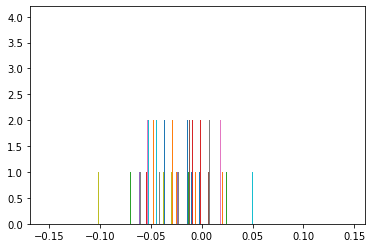

In [22]:
plt.hist(dummy_corr[['Rock','Experimental','Classical','Hip-Hop']], bins=20)
plt.show()

### Genres

In [6]:
# Genres Table
genres = pd.read_csv('../data/raw/fma_metadata/genres.csv',header=0)

(163, 5)


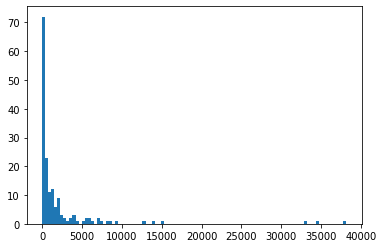

In [24]:
print(genres.shape)
plt.hist(genres['#tracks'], bins=100)
plt.show()

In [25]:
print(genres.columns)

Index(['genre_id', '#tracks', 'parent', 'title', 'top_level'], dtype='object')


In [26]:
print(genres.head(100))

    genre_id  #tracks  parent                   title  top_level
0          1     8693      38             Avant-Garde         38
1          2     5271       0           International          2
2          3     1752       0                   Blues          3
3          4     4126       0                    Jazz          4
4          5     4106       0               Classical          5
..       ...      ...     ...                     ...        ...
95       186      682      38            Sound Poetry         38
96       187      292       5  20th Century Classical          5
97       188      301      20                  Poetry         20
98       189       26      65              Talk Radio         20
99       214       40      92           North African          2

[100 rows x 5 columns]


/Users/ryanswan/anaconda3/lib/python3.7/site-packages/matplotlib/image.py:397: UserWarning: Warning: converting a masked element to nan.
  dv = (np.float64(self.norm.vmax) -
/Users/ryanswan/anaconda3/lib/python3.7/site-packages/matplotlib/image.py:398: UserWarning: Warning: converting a masked element to nan.
  np.float64(self.norm.vmin))
/Users/ryanswan/anaconda3/lib/python3.7/site-packages/matplotlib/image.py:405: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
/Users/ryanswan/anaconda3/lib/python3.7/site-packages/matplotlib/image.py:410: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
<string>:6: UserWarning: Warning: converting a masked element to nan.
/Users/ryanswan/anaconda3/lib/python3.7/site-packages/numpy/ma/core.py:711: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


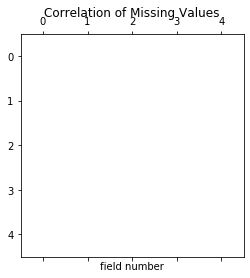

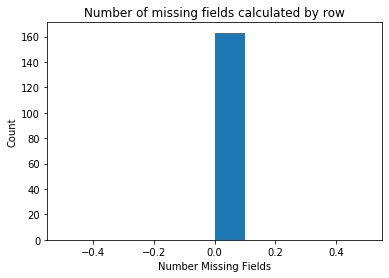

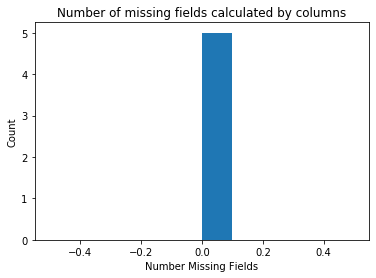

In [27]:
genres_na = NaAnalysis(genres)
genres_na.run_analysis()

The genre table is complete, and no missing values exist.

In [28]:
# We can join the genre table back to the tracks table 
# to assess how many of each genre/subgenre are present
print(tracks.columns)
tracks['id.1'].head()

MultiIndex([( 'album',          'comments'),
            ( 'album',      'date_created'),
            ( 'album',     'date_released'),
            ( 'album',          'engineer'),
            ( 'album',         'favorites'),
            ( 'album',                'id'),
            ( 'album',       'information'),
            ( 'album',           'listens'),
            ( 'album',          'producer'),
            ( 'album',              'tags'),
            ( 'album',             'title'),
            ( 'album',            'tracks'),
            ( 'album',              'type'),
            ('artist', 'active_year_begin'),
            ('artist',   'active_year_end'),
            ('artist', 'associated_labels'),
            ('artist',               'bio'),
            ('artist',          'comments'),
            ('artist',      'date_created'),
            ('artist',         'favorites'),
            ('artist',                'id'),
            ('artist',          'latitude'),
          

KeyError: 'id.1'

### Features

In [7]:
# Features Table
features = pd.read_csv('../data/raw/fma_metadata/features.csv',index_col=0,header=[0,1,2])

In [30]:
print(features.shape)

(106574, 518)


In [31]:
for f in features.columns:
  print(f)

('chroma_cens', 'kurtosis', '01')
('chroma_cens', 'kurtosis', '02')
('chroma_cens', 'kurtosis', '03')
('chroma_cens', 'kurtosis', '04')
('chroma_cens', 'kurtosis', '05')
('chroma_cens', 'kurtosis', '06')
('chroma_cens', 'kurtosis', '07')
('chroma_cens', 'kurtosis', '08')
('chroma_cens', 'kurtosis', '09')
('chroma_cens', 'kurtosis', '10')
('chroma_cens', 'kurtosis', '11')
('chroma_cens', 'kurtosis', '12')
('chroma_cens', 'max', '01')
('chroma_cens', 'max', '02')
('chroma_cens', 'max', '03')
('chroma_cens', 'max', '04')
('chroma_cens', 'max', '05')
('chroma_cens', 'max', '06')
('chroma_cens', 'max', '07')
('chroma_cens', 'max', '08')
('chroma_cens', 'max', '09')
('chroma_cens', 'max', '10')
('chroma_cens', 'max', '11')
('chroma_cens', 'max', '12')
('chroma_cens', 'mean', '01')
('chroma_cens', 'mean', '02')
('chroma_cens', 'mean', '03')
('chroma_cens', 'mean', '04')
('chroma_cens', 'mean', '05')
('chroma_cens', 'mean', '06')
('chroma_cens', 'mean', '07')
('chroma_cens', 'mean', '08')
('ch

In [32]:
print(features.head())

feature    chroma_cens                                                    \
statistics    kurtosis                                                     
number              01        02        03        04        05        06   
track_id                                                                   
2             7.180653  5.230309  0.249321  1.347620  1.482478  0.531371   
3             1.888963  0.760539  0.345297  2.295201  1.654031  0.067592   
5             0.527563 -0.077654 -0.279610  0.685883  1.937570  0.880839   
10            3.702245 -0.291193  2.196742 -0.234449  1.367364  0.998411   
20           -0.193837 -0.198527  0.201546  0.258556  0.775204  0.084794   

feature                                             ...   tonnetz            \
statistics                                          ...       std             
number            07        08        09        10  ...        04        05   
track_id                                            ...                       

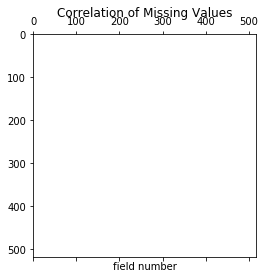

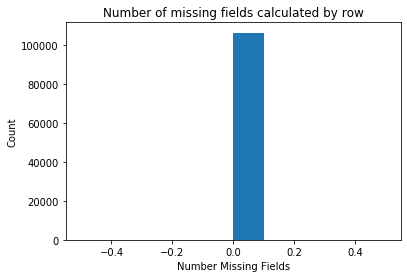

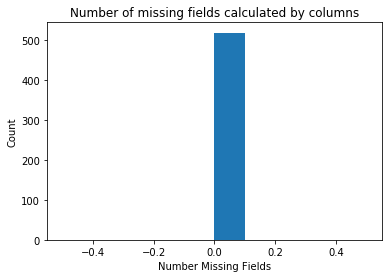

In [33]:
features_na = NaAnalysis(features)
features_na.run_analysis()

In [34]:
print(features_na.col_na.sort_values())

feature      statistics  number
chroma_cens  kurtosis    01        0
mfcc         skew        02        0
                         01        0
             min         20        0
                         19        0
                                  ..
chroma_cqt   std         10        0
                         09        0
                         08        0
chroma_stft  mean        02        0
zcr          std         01        0
Length: 518, dtype: int64


### Echonest

In [8]:
# Echonest Table
echonest = pd.read_csv('../data/raw/fma_metadata/echonest.csv', index_col=0, header=[0,1,2])

In [36]:
print(echonest.shape)

(13129, 249)


In [37]:
for f in echonest.columns:
    print(f)

('echonest', 'audio_features', 'acousticness')
('echonest', 'audio_features', 'danceability')
('echonest', 'audio_features', 'energy')
('echonest', 'audio_features', 'instrumentalness')
('echonest', 'audio_features', 'liveness')
('echonest', 'audio_features', 'speechiness')
('echonest', 'audio_features', 'tempo')
('echonest', 'audio_features', 'valence')
('echonest', 'metadata', 'album_date')
('echonest', 'metadata', 'album_name')
('echonest', 'metadata', 'artist_latitude')
('echonest', 'metadata', 'artist_location')
('echonest', 'metadata', 'artist_longitude')
('echonest', 'metadata', 'artist_name')
('echonest', 'metadata', 'release')
('echonest', 'ranks', 'artist_discovery_rank')
('echonest', 'ranks', 'artist_familiarity_rank')
('echonest', 'ranks', 'artist_hotttnesss_rank')
('echonest', 'ranks', 'song_currency_rank')
('echonest', 'ranks', 'song_hotttnesss_rank')
('echonest', 'social_features', 'artist_discovery')
('echonest', 'social_features', 'artist_familiarity')
('echonest', 'so

In [38]:
print(echonest.head())

               echonest                                                    \
         audio_features                                                     
           acousticness danceability    energy instrumentalness  liveness   
track_id                                                                    
2              0.416675     0.675894  0.634476         0.010628  0.177647   
3              0.374408     0.528643  0.817461         0.001851  0.105880   
5              0.043567     0.745566  0.701470         0.000697  0.373143   
10             0.951670     0.658179  0.924525         0.965427  0.115474   
134            0.452217     0.513238  0.560410         0.019443  0.096567   

                                                                        ...  \
                                           metadata                     ...   
         speechiness    tempo   valence  album_date         album_name  ...   
track_id                                                             

In [39]:
echonest.describe()

echonest                                               \
      audio_features                                                
        acousticness  danceability        energy instrumentalness   
count   1.312900e+04  13129.000000  13129.000000     13129.000000   
mean    5.246876e-01      0.487290      0.537516         0.640536   
std     3.837186e-01      0.190148      0.278049         0.361430   
min     9.035000e-07      0.051307      0.000020         0.000000   
25%     1.037726e-01      0.344759      0.321300         0.323466   
50%     5.739848e-01      0.485635      0.549113         0.838134   
75%     9.207270e-01      0.629094      0.776254         0.918244   
max     9.957965e-01      0.968645      0.999964         0.998016   

                                                                               \
                                                                     metadata   
           liveness   speechiness         tempo       valence artist_latitude   
count  13129.000000  13129.000000  13129.000000  13129.000000     9770.000000   
mean       0.187804      0.099174    123.080061      0.439761       39.961892   
std        0.158051      0.137381     35.015137      0.276028       15.554275   
min        0.025297      0.022324     12.753000      0.000010      -45.867100   
25%        0.101406      0.036932     95.967000      0.197321       37.784827   
50%        0.119002      0.049019    120.057000      0.417743       40.781400   
75%        0.211041      0.085452    145.318000      0.665575       47.254575   
max        0.980330      0.966177    251.072000      0.999990       68.927500   

                        ...                                                \
                        ... temporal_features                               
      artist_longitude  ...               214           215           216   
count      9770.000000  ...      13129.000000  13129.000000  13129.000000   
mean        -49.984040  ...         -1.966002     10.745951      0.308984   
std          59.377974  ...          1.708499     20.053146      0.140164   
min        -155.434000  ...        -17.966162     -1.867880      0.129023   
25%         -87.632400  ...         -2.587326      1.229409      0.242371   
50%         -74.007100  ...         -1.565120      4.355214      0.286014   
75%          -0.127140  ...         -0.875471     11.407599      0.339086   
max         174.770000  ...          1.663782    423.621094      5.211423   

                                                                             \
                                                                              
                217           218           219           220           221   
count  13129.000000  13129.000000  13129.000000  13129.000000  13129.000000   
mean       0.255381      0.163876      0.068526      4.183428      4.114902   
std        0.083731      3.484144      0.010930      4.967481      4.967004   
min        0.098280      0.000518      0.060000      0.322180      0.224580   
25%        0.208750      0.021321      0.063080      1.817050      1.749660   
50%        0.242745      0.042146      0.064490      3.094060      3.026260   
75%        0.285305      0.087516      0.070070      5.147530      5.079770   
max        1.680570    375.744781      0.342000    226.326767    226.244080   

                                   
                                   
                222           223  
count  13129.000000  13129.000000  
mean       7.605432    138.932366  
std        6.444884    225.584951  
min       -3.566834     -1.687834  
25%        2.866906     15.565598  
50%        5.502340     55.874954  
75%       10.597994    175.938553  
max       67.041878   4790.696777  

[8 rows x 244 columns]

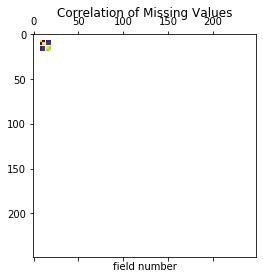

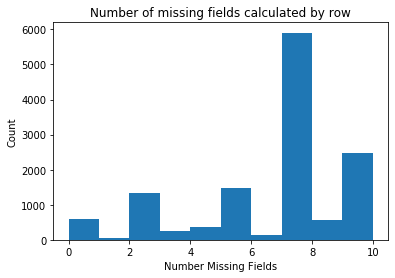

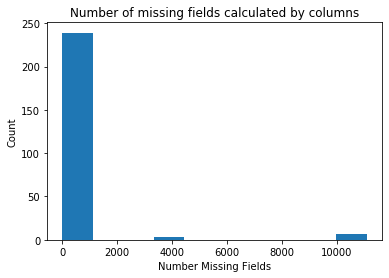

echonest  audio_features     acousticness                   0
          temporal_features  132                            0
                             133                            0
                             134                            0
                             135                            0
                                                        ...  
          ranks              artist_familiarity_rank    10304
                             artist_hotttnesss_rank     10305
          metadata           album_date                 10412
          ranks              song_hotttnesss_rank       10923
                             song_currency_rank         11096
Length: 249, dtype: int64


In [40]:
echonest_na = NaAnalysis(echonest)
echonest_na.run_analysis()
print(echonest_na.col_na.sort_values())

## Analyses

### Location Data

In [41]:
print(np.isnan(tracks.artist.latitude).sum(), 
      np.isnan(tracks.artist.longitude).sum(),
      len(tracks))

62030 62030 106574


In [43]:
import geopandas as gp
from shapely.geometry import Point, Polygon

In [44]:
geometry = [Point(xy) for xy in zip(tracks.artist.longitude,tracks.artist.latitude)]
crs = {'init' :'epsg:4326'}
geo_df = gp.GeoDataFrame(tracks, crs=crs, geometry=geometry)
geo_df.head()

album                                                     \
         comments         date_created        date_released engineer   
track_id                                                               
2               0  2008-11-26 01:44:45  2009-01-05 00:00:00      NaN   
3               0  2008-11-26 01:44:45  2009-01-05 00:00:00      NaN   
5               0  2008-11-26 01:44:45  2009-01-05 00:00:00      NaN   
10              0  2008-11-26 01:45:08  2008-02-06 00:00:00      NaN   
20              0  2008-11-26 01:45:05  2009-01-06 00:00:00      NaN   

                                                                          \
         favorites id                                information listens   
track_id                                                                   
2                4  1                                    <p></p>    6073   
3                4  1                                    <p></p>    6073   
5                4  1                                    <p></p>    6073   
10               4  6                                        NaN   47632   
20               2  4  <p> "spiritual songs" from Nicky Cook</p>    2710   

                        ...    track                \
         producer tags  ... interest language_code   
track_id                ...                          
2             NaN   []  ...     4656            en   
3             NaN   []  ...     1470            en   
5             NaN   []  ...     1933            en   
10            NaN   []  ...    54881            en   
20            NaN   []  ...      978            en   

                                                                              \
                                                    license listens lyricist   
track_id                                                                       
2         Attribution-NonCommercial-ShareAlike 3.0 Inter...    1293      NaN   
3         Attribution-NonCommercial-ShareAlike 3.0 Inter...     514      NaN   
5         Attribution-NonCommercial-ShareAlike 3.0 Inter...    1151      NaN   
10        Attribution-NonCommercial-NoDerivatives (aka M...   50135      NaN   
20        Attribution-NonCommercial-NoDerivatives (aka M...     361      NaN   

                                                               geometry  
         number publisher tags            title                          
track_id                                                                 
2             3       NaN   []             Food  POINT (-74.406 40.058)  
3             4       NaN   []     Electric Ave  POINT (-74.406 40.058)  
5             6       NaN   []       This World  POINT (-74.406 40.058)  
10            1       NaN   []          Freeway         POINT (nan nan)  
20            3       NaN   []  Spiritual Level    POINT (0.892 51.896)  

[5 rows x 53 columns]

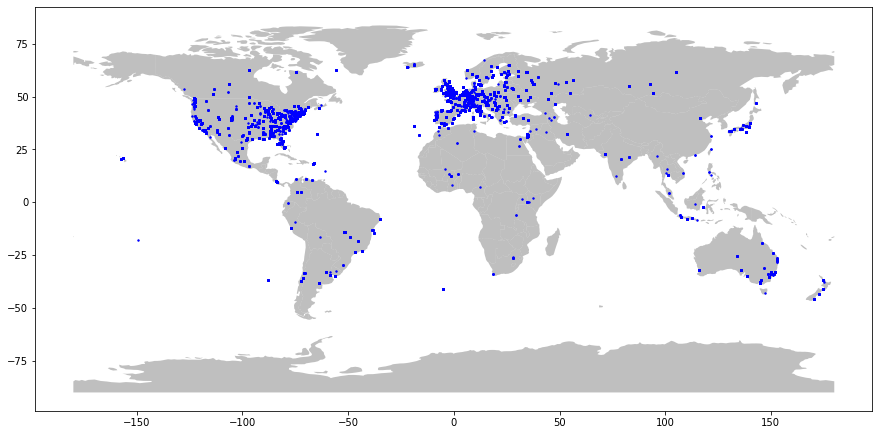

In [46]:
import geopandas as gp 

fig,ax = plt.subplots(figsize = (15,15))
world = gp.read_file(gp.datasets.get_path('naturalearth_lowres'))
world.plot(ax = ax, alpha = 0.5, color='grey')
# geo_df.plot(ax=ax, markersize = 2, color = 'blue', marker='o')
geo_df.plot(ax=ax, markersize = 2, color = 'blue', marker='o')
plt.show()

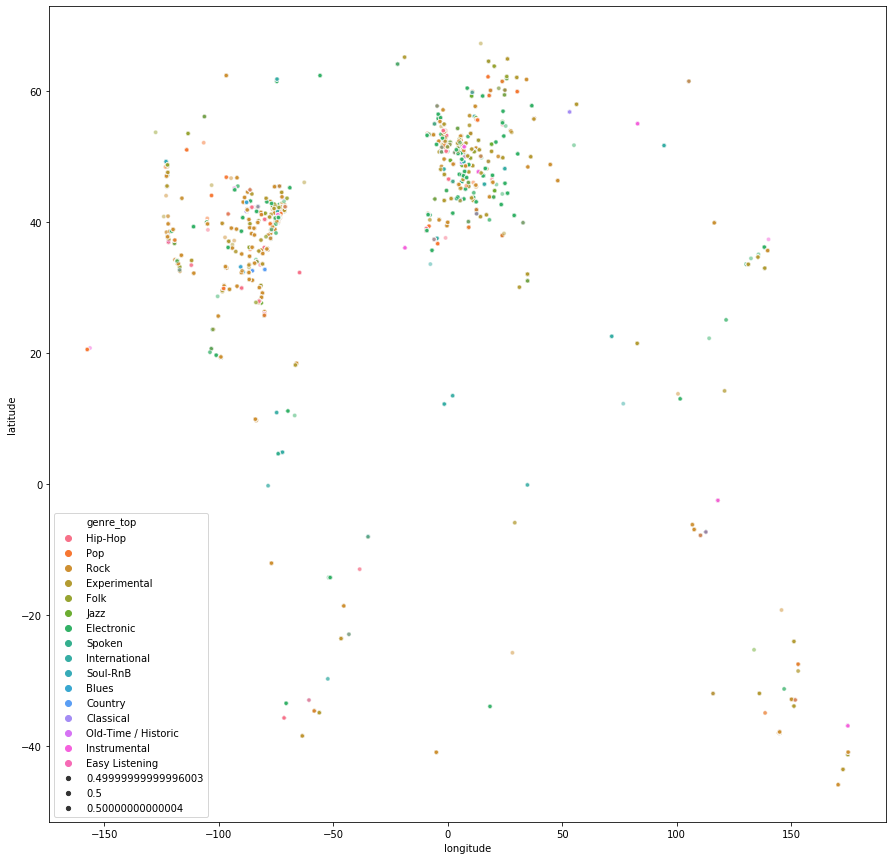

In [47]:
fig,ax = plt.subplots(figsize = (15,15))
sns.scatterplot(x=tracks.artist.longitude, 
                y=tracks.artist.latitude, 
                hue=tracks.track.genre_top, 
                size=0.5,
                alpha=0.5)
plt.show()

In [48]:
# Assign tracks regional coordinates

tracks['region'] = ''
north_america = (tracks.artist.longitude < -25) & (tracks.artist.latitude > 10)
south_america = (tracks.artist.longitude < -25) & (tracks.artist.latitude < 10)
europe = (tracks.artist.longitude > -25) & (tracks.artist.latitude > 25) & (tracks.artist.longitude < 50)
africa = (tracks.artist.longitude > -10) & (tracks.artist.latitude < 25) & (tracks.artist.longitude < 50)
asia = (tracks.artist.latitude > -15) & (tracks.artist.longitude > 50)
australia = (tracks.artist.latitude < -15) & (tracks.artist.longitude > 100)

tracks.loc[north_america,'region'] = 'NA'
tracks.loc[south_america,'region'] = 'SA'
tracks.loc[europe,'region'] = 'EUR'
tracks.loc[africa,'region'] = 'AFR'
tracks.loc[asia,'region'] = 'ASI'
tracks.loc[australia,'region'] = 'AUS'

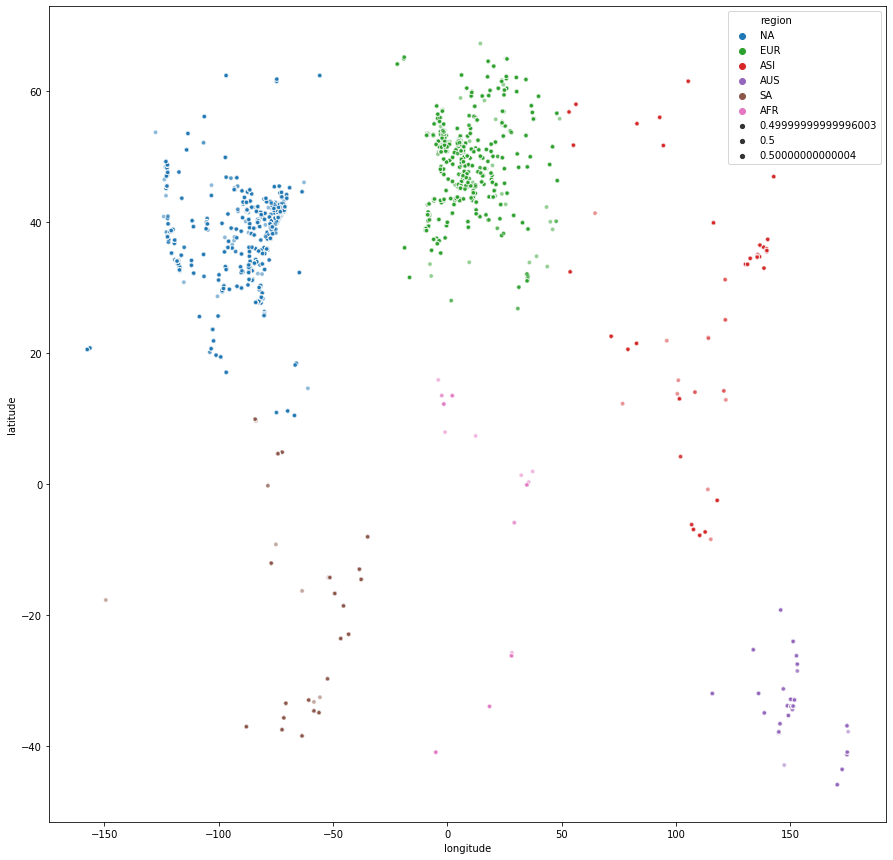

In [49]:
fig,ax = plt.subplots(figsize = (15,15))
sns.scatterplot(x=tracks.artist.longitude, 
                y=tracks.artist.latitude, 
                hue=tracks.region, 
                size=0.5,
                alpha=0.5)
plt.show()

In [50]:
tracks.region.value_counts()

       62030
NA     24857
EUR    15414
ASI     2075
AUS     1230
SA       893
AFR       75
Name: region, dtype: int64

### Genre nesting analysis

In [51]:
genres.head()

,genre_id,#tracks,parent,title,top_level
0,1,8693,38,Avant-Garde,38
1,2,5271,0,International,2
2,3,1752,0,Blues,3
3,4,4126,0,Jazz,4
4,5,4106,0,Classical,5


In [52]:
tracks.track.genre_top.value_counts()

Rock                   14182
Experimental           10608
Electronic              9372
Hip-Hop                 3552
Folk                    2803
Pop                     2332
Instrumental            2079
International           1389
Classical               1230
Jazz                     571
Old-Time / Historic      554
Spoken                   423
Country                  194
Soul-RnB                 175
Blues                    110
Easy Listening            24
Name: genre_top, dtype: int64

In [53]:
tracks.track.genre_top.isna().sum()

56976

In [54]:
tracks[pd.isna(tracks.track.genre_top)].track.genres

track_id
20            [76, 103]
26            [76, 103]
30            [76, 103]
46            [76, 103]
48            [76, 103]
              ...      
155276     [15, 32, 38]
155277     [15, 32, 38]
155278        [42, 107]
155288               []
155320    [10, 12, 169]
Name: genres, Length: 56976, dtype: object

Many of the tracks with missing genre information still seem to have genre info. However they are tagged with multiple top-level tags.

In [55]:
track_genres = tracks[pd.isna(tracks.track.genre_top)].track.genres

In [56]:
# isolate top three most common genres
genre_filter = tracks.track.genre_top.isin(['Rock','Experimental','Electronic'])
genre_tracks = tracks.loc[genre_filter,:]

In [57]:
genre_tracks.shape

(34162, 54)

#### Considering reduced genres correlation with expanded features

In [58]:
tracks_new = tracks.copy()
tracks_new.columns = ['_'.join(col).strip() for col in tracks_new.columns.values]
features_new = features.copy()
features_new.columns = ['_'.join(col).strip() for col in features_new.columns.values]

In [59]:
tracks_merged = pd.merge(tracks_new, features_new, left_index=True, right_index=True)

In [60]:
tracks_merged.shape

(106574, 572)

In [61]:
# Correlation of each feature with target value
dummy_genre = pd.get_dummies(tracks_merged.track_genre_top)
dummy_tracks = pd.concat([dummy_genre, tracks_merged], axis=1)
dummy_corr = dummy_tracks.corr()

In [62]:
dummy_corr[dummy_corr == 1] = np.nan
np.max(dummy_corr)[0:16]

Blues                  0.032736
Classical              0.178466
Country                0.027026
Easy Listening         0.010584
Electronic             0.163788
Experimental           0.147102
Folk                   0.134414
Hip-Hop                0.164598
Instrumental           0.088191
International          0.075011
Jazz                   0.054712
Old-Time / Historic    0.179279
Pop                    0.164082
Rock                   0.268769
Soul-RnB               0.032523
Spoken                 0.103521
dtype: float64

In [63]:
tracks_merged

,album_comments,album_date_created,album_date_released,album_engineer,album_favorites,album_id,album_information,album_listens,album_producer,album_tags,...,tonnetz_std_04,tonnetz_std_05,tonnetz_std_06,zcr_kurtosis_01,zcr_max_01,zcr_mean_01,zcr_median_01,zcr_min_01,zcr_skew_01,zcr_std_01
track_id,,,,,,,,,,,,,,,,,,,,,
2,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,[],...,0.054125,0.012226,0.012111,5.758890,0.459473,0.085629,0.071289,0.000000,2.089872,0.061448
3,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,[],...,0.063831,0.014212,0.017740,2.824694,0.466309,0.084578,0.063965,0.000000,1.716724,0.069330
5,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,[],...,0.040730,0.012691,0.014759,6.808415,0.375000,0.053114,0.041504,0.000000,2.193303,0.044861
10,0,2008-11-26 01:45:08,2008-02-06 00:00:00,NaN,4,6,NaN,47632,NaN,[],...,0.074358,0.017952,0.013921,21.434212,0.452148,0.077515,0.071777,0.000000,3.542325,0.040800
20,0,2008-11-26 01:45:05,2009-01-06 00:00:00,NaN,2,4,"<p> ""spiritual songs"" from Nicky Cook</p>",2710,NaN,[],...,0.095003,0.022492,0.021355,16.669037,0.469727,0.047225,0.040039,0.000977,3.189831,0.030993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155316,0,2017-03-30 15:20:35,2017-02-17 00:00:00,NaN,0,22940,"<p>A live performance at Monty Hall on Feb 17,...",1506,Monty Hall,[],...,0.128410,0.022547,0.019816,4.448255,0.172852,0.028773,0.028320,0.003906,0.955388,0.012385
155317,0,2017-03-30 15:20:35,2017-02-17 00:00:00,NaN,0,22940,"<p>A live performance at Monty Hall on Feb 17,...",1506,Monty Hall,[],...,0.132964,0.023548,0.026527,3.270612,0.196289,0.031116,0.027832,0.002441,1.283060,0.019059
155318,0,2017-03-30 15:20:35,2017-02-17 00:00:00,NaN,0,22940,"<p>A live performance at Monty Hall on Feb 17,...",1506,Monty Hall,[],...,0.108324,0.017540,0.020471,2.356727,0.212891,0.038450,0.037109,0.003418,0.828569,0.017904


In [64]:
import geopandas as gp
import matplotlib.pyplot as plt
us_states = gp.read_file('/Users/ryanswan/Downloads/states_21basic')


We can plot the data for the whole world against our US map

<function matplotlib.pyplot.show(*args, **kw)>

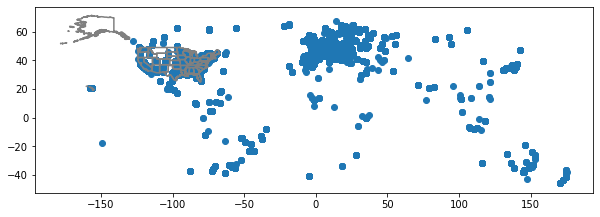

In [65]:
ax = us_states.geometry.boundary.plot(color='gray', figsize=(10,10))
geo_df.plot(figsize=(10,10), ax=ax)
plt.show

Finding data just within the united states...

In [66]:
united_states = us_states.geometry.unary_union
in_us_boundary = geo_df.geometry.within(united_states)
inside_us = geo_df[in_us_boundary]

Roughly 20% of all tracks are in the US

In [67]:
inside_us.shape

(21013, 54)

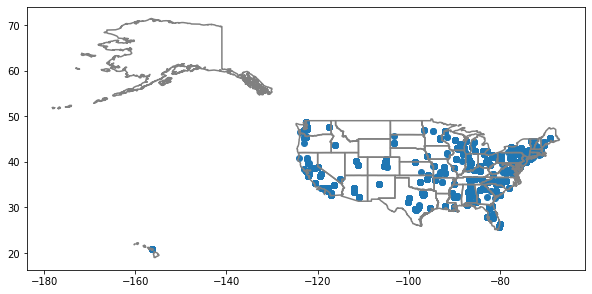

In [68]:
ax = us_states.geometry.boundary.plot(color='gray', figsize=(10,10))
inside_us.plot(figsize=(10,10), ax=ax)
plt.show()

In [69]:
# For simplicity of plotting we skip Hawaii and Alaska
continental_us = us_states[~us_states.STATE_NAME.isin(['Alaska','Hawaii'])]
in_cont_us = inside_us[inside_us.geometry.within(continental_us.geometry.unary_union)]

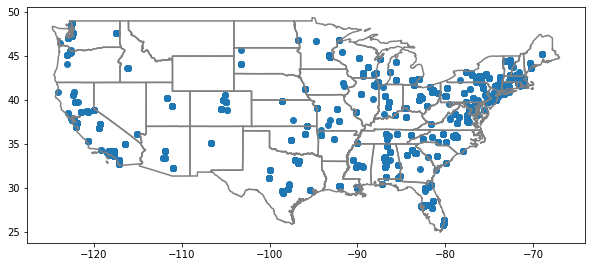

In [103]:
ax = continental_us.geometry.boundary.plot(color='gray', figsize=(10,10))
in_cont_us.plot(figsize=(10,10), ax=ax)
plt.show()

In [131]:
# # Binning points by region in shapefile
# # From: https://stackoverflow.com/questions/7861196/check-if-a-geopoint-with-latitude-and-longitude-is-within-a-shapefile

# from gdal import ogr
# from IPython import embed
# import sys

# drv = ogr.GetDriverByName('ESRI Shapefile')
# ds_in = drv.Open('/Users/ryanswan/Downloads/states_21basic/states.shp')
# lyr_in = ds_in.GetLayer(0)
# print(lyr_in.GetFeatureCount())

# for i in range(1,lyr_in.GetFeatureCount()):
#     field = lyr_in.GetFeature(i)
#     print(field)

print(in_cont_us)


            album                                                     \
         comments         date_created        date_released engineer   
track_id                                                               
2               0  2008-11-26 01:44:45  2009-01-05 00:00:00      NaN   
3               0  2008-11-26 01:44:45  2009-01-05 00:00:00      NaN   
5               0  2008-11-26 01:44:45  2009-01-05 00:00:00      NaN   
134             0  2008-11-26 01:44:45  2009-01-05 00:00:00      NaN   
137             1  2008-11-26 01:49:35  2006-12-01 00:00:00      NaN   
...           ...                  ...                  ...      ...   
154962          0  2017-03-20 16:25:51  2016-09-13 00:00:00      NaN   
154963          0  2017-03-20 16:25:51  2016-09-13 00:00:00      NaN   
154964          0  2017-03-20 16:25:51  2016-09-13 00:00:00      NaN   
154965          0  2017-03-20 16:25:51  2016-09-13 00:00:00      NaN   
154966          0  2017-03-20 16:25:51  2016-09-13 00:00:00     

In [161]:
from shapely.geometry import Point

artists = list(zip(in_cont_us.artist.longitude, in_cont_us.artist.latitude))

print(continental_us.columns)

output = []
for artist in artists:
    coord = Point(artist)
    which_state = continental_us.geometry.contains(coord)
    output.append(continental_us[which_state].STATE_NAME.values[0])

Index(['STATE_NAME', 'DRAWSEQ', 'STATE_FIPS', 'SUB_REGION', 'STATE_ABBR',
       'geometry'],
      dtype='object')


In [181]:
from collections import Counter
state_count = Counter(output)

In [189]:
state_vals = pd.DataFrame.from_dict(state_count, orient='index').reset_index()
state_vals = state_vals.rename(columns={'index':'state', 0:'n_artists'})
# state_vals
us_chloropleth = continental_us.merge(state_vals, left_on='STATE_NAME', right_on='state')

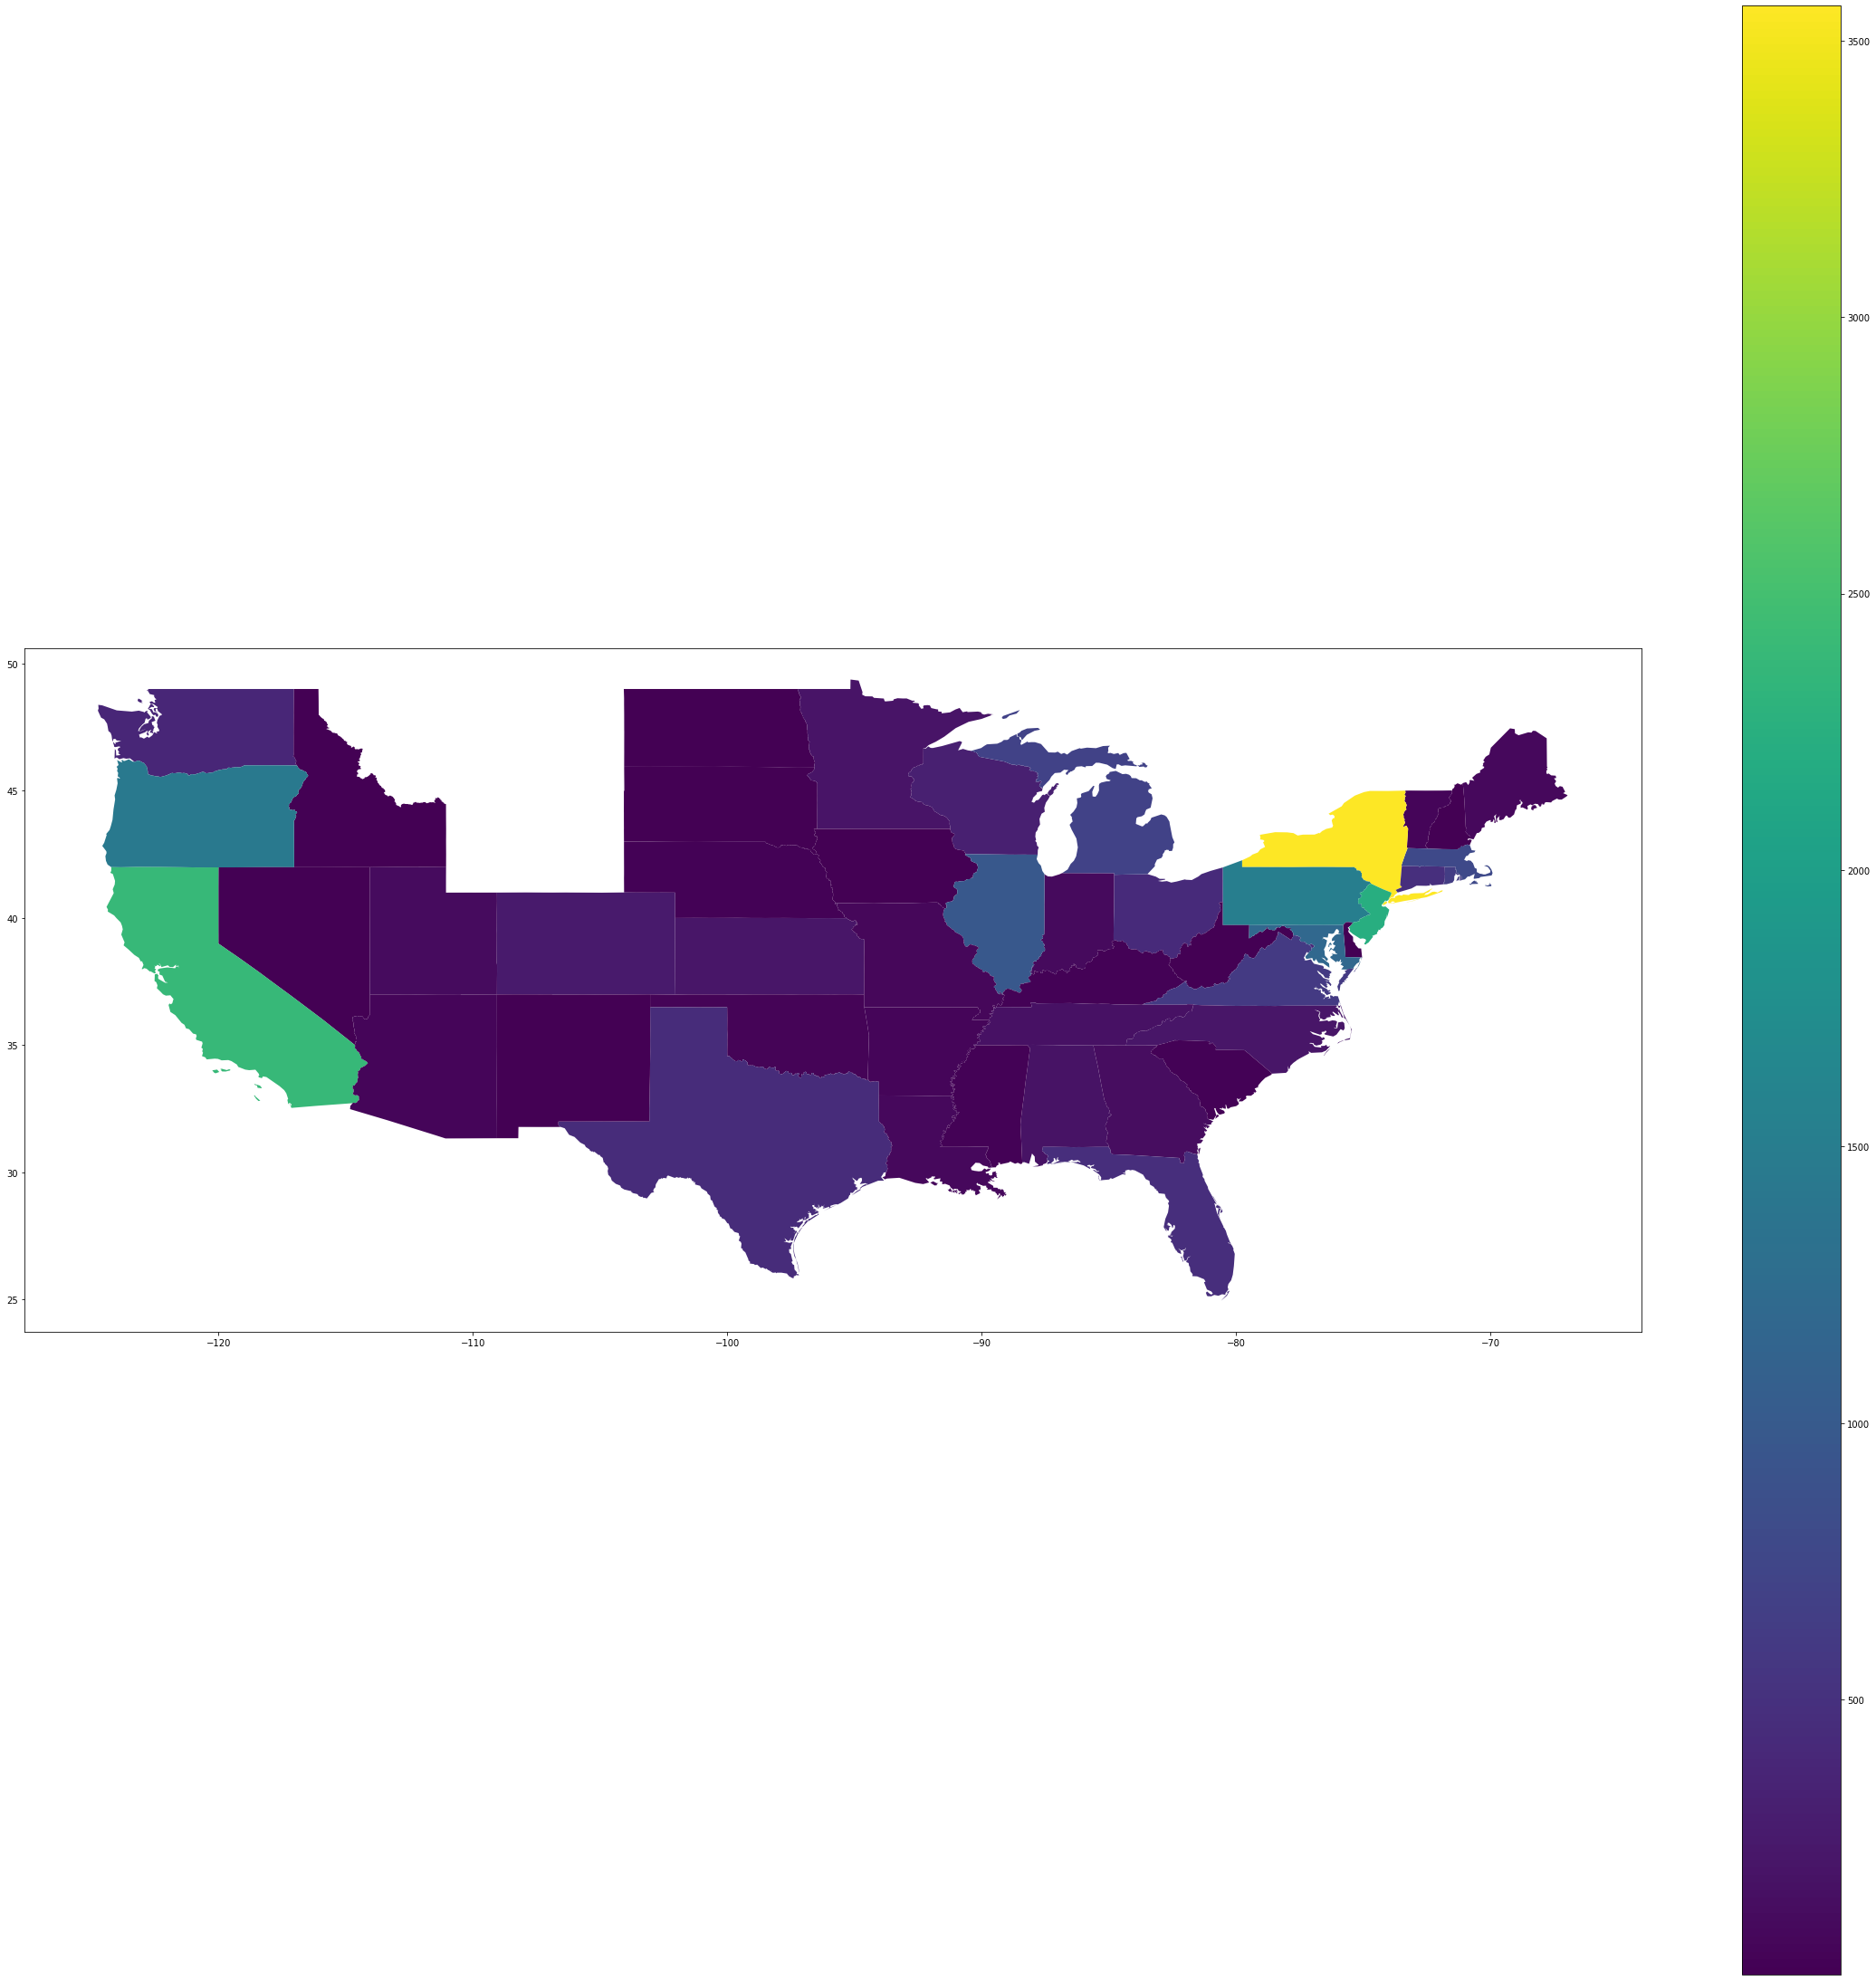

In [193]:
us_chloropleth.plot(column='n_artists', figsize=(40,40), legend=True)
plt.show()

Let's wrap some of these analyses in functions...

In [204]:
def filter_pts_by_boundary(geo_df, shapefile):
    '''Return only points inside the specified shapefile boundary'''
    boundary = shapefile.geometry.unary_union
    in_boundary = geo_df.geometry.within(boundary)
    return geo_df[in_boundary]

def assign_pt_to_region(long, lat, shapefile, field):
    '''Check for membership in shapefile polygons and return a count of points'''
    output = []
    coord = list(zip(long, lat))
    for c in coord:
        c = Point(c)
        which_shape = shapefile.geometry.contains(c)
        output.append(shapefile[which_shape][field].values[0])
    return output

def add_chloro_column(region_list, shapefile, field):
    '''Add count of values to shapefile regions'''
    val_count = Counter(region_list)
    merge_col = pd.DataFrame.from_dict(val_count, orient='index').reset_index()
    merge_col = merge_col.rename(columns={'index':'merge_field', 0:'vals'})
    new_geo_df = shapefile.merge(merge_col, left_on=field, right_on='merge_field')
    return new_geo_df


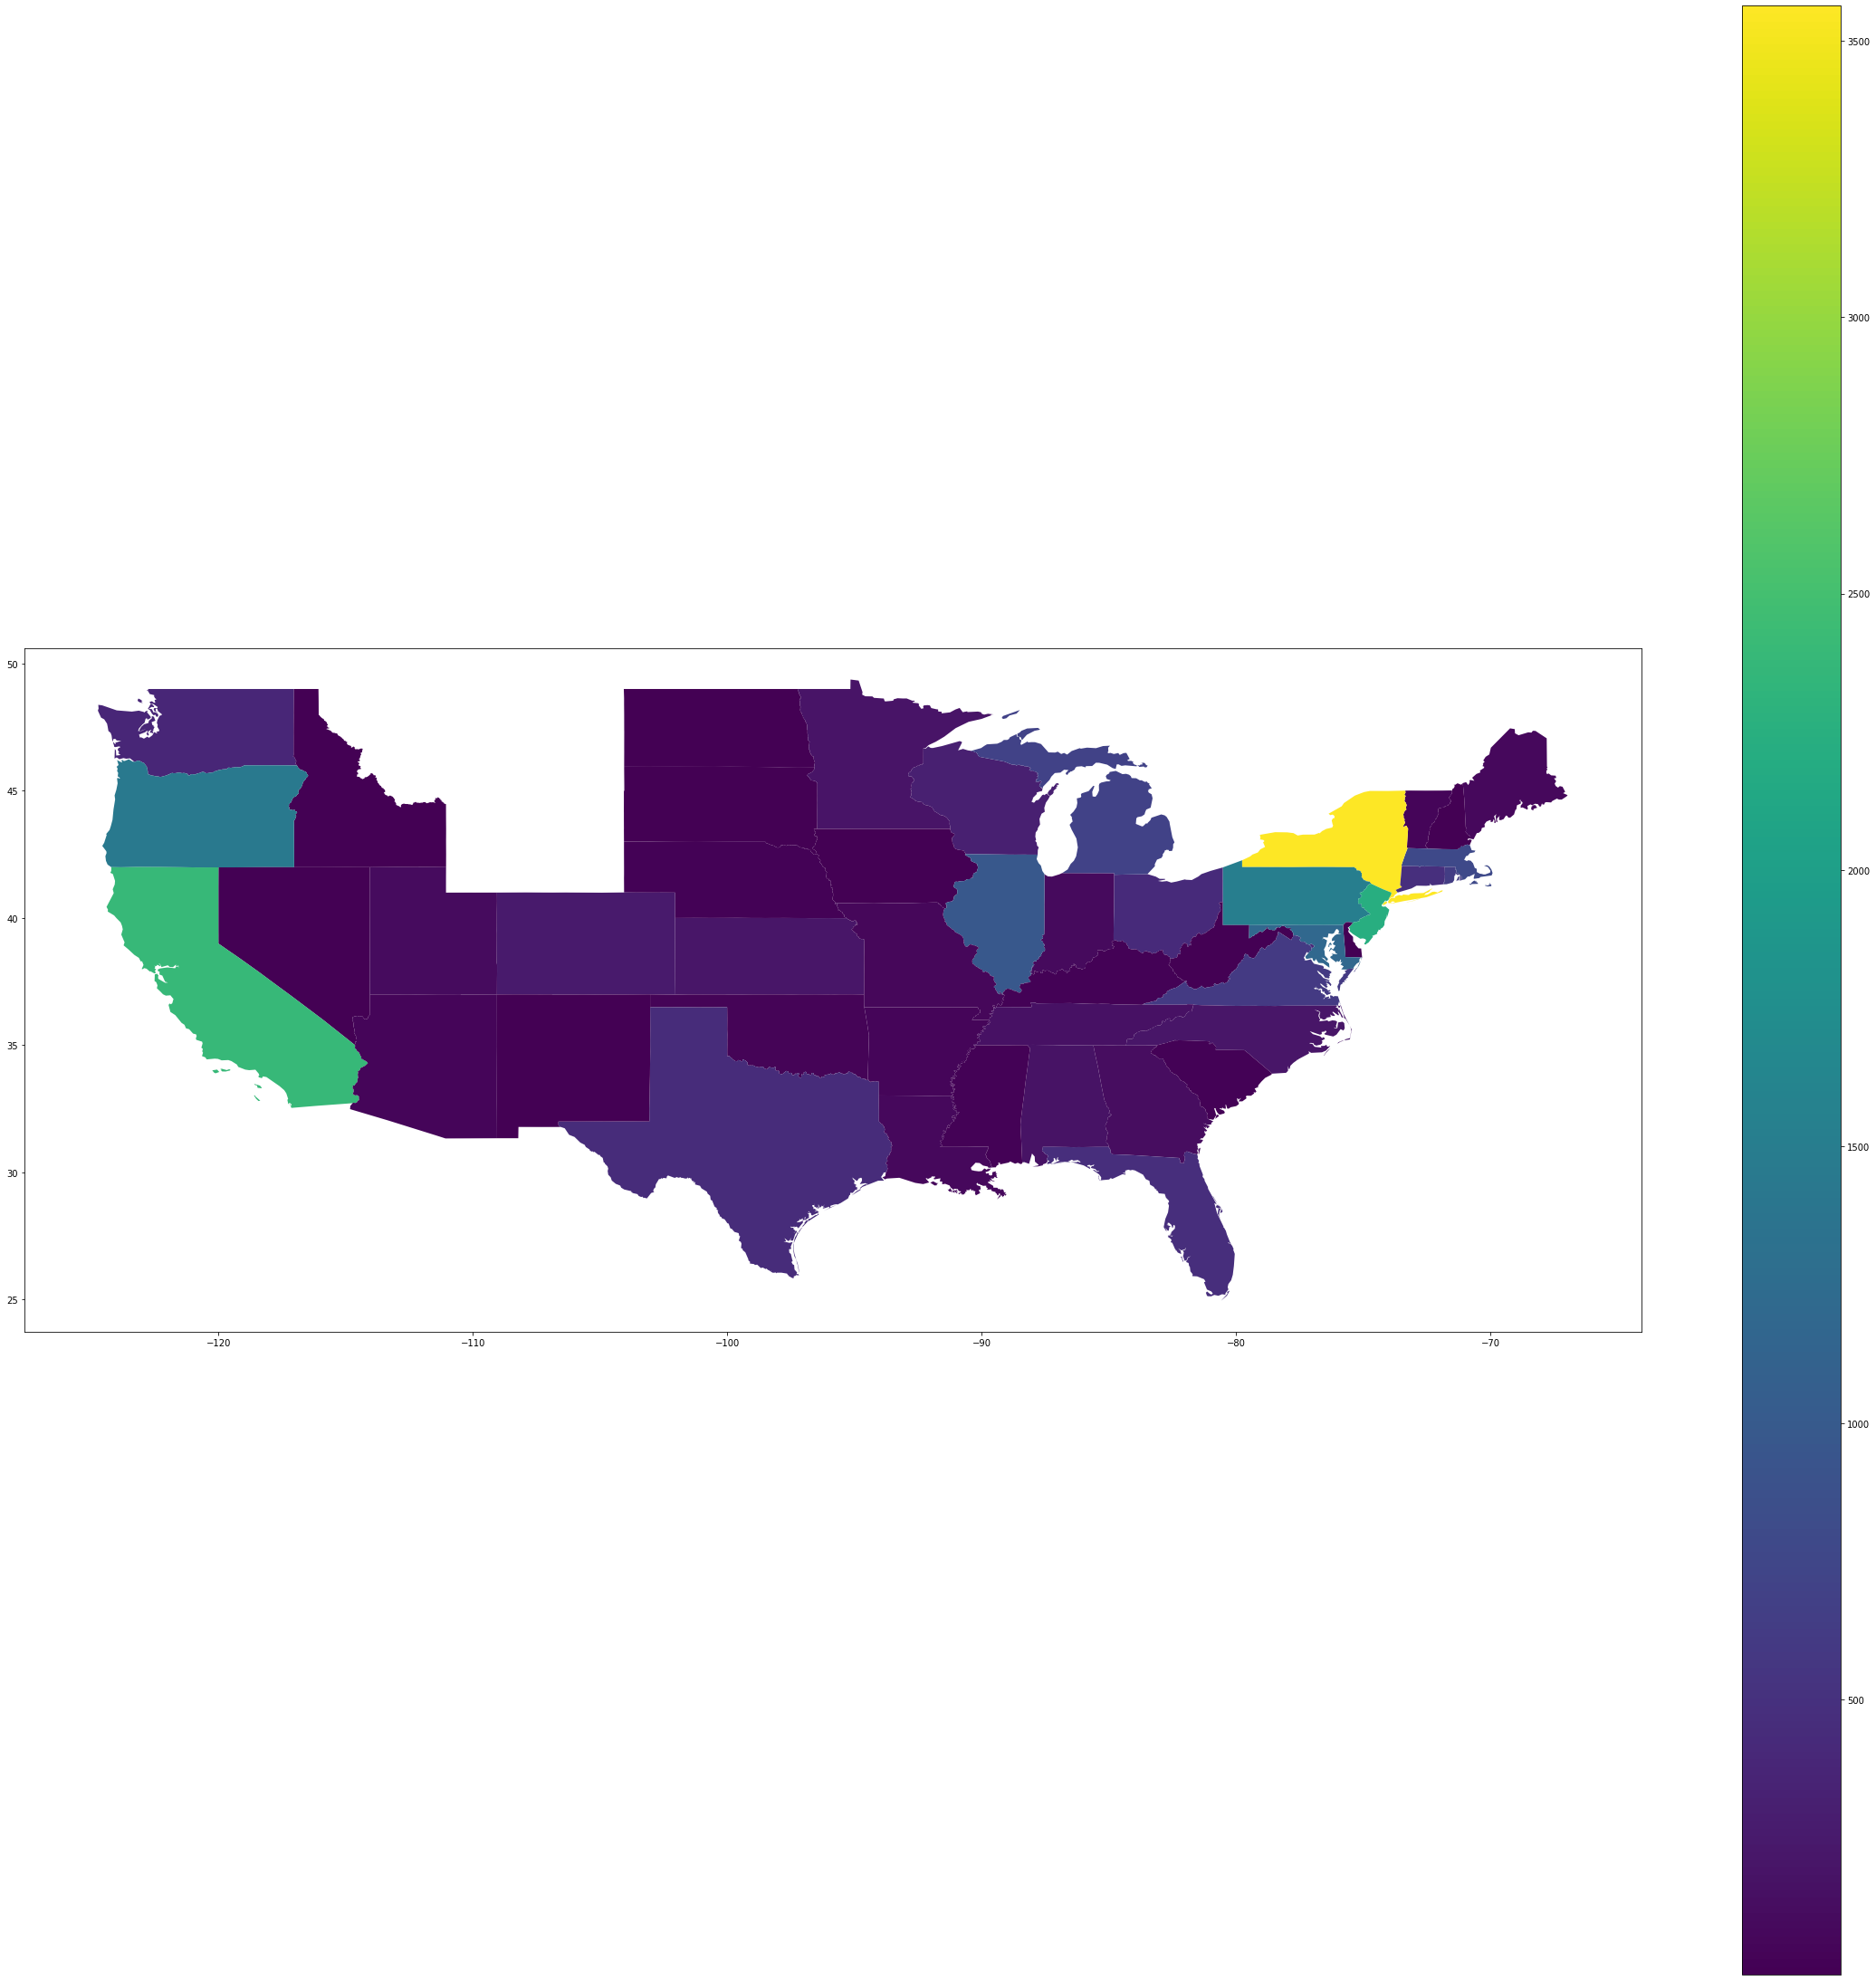

In [207]:
# test = filter_pts_by_boundary(geo_df=geo_df, shapefile=continental_us)
# test2 = assign_pt_to_region(test.artist.longitude, test.artist.latitude, continental_us, 'STATE_NAME')
test3 = add_chloro_column(test2, continental_us, 'STATE_NAME')
test3.plot(column='vals', figsize=(40,40), legend=True)

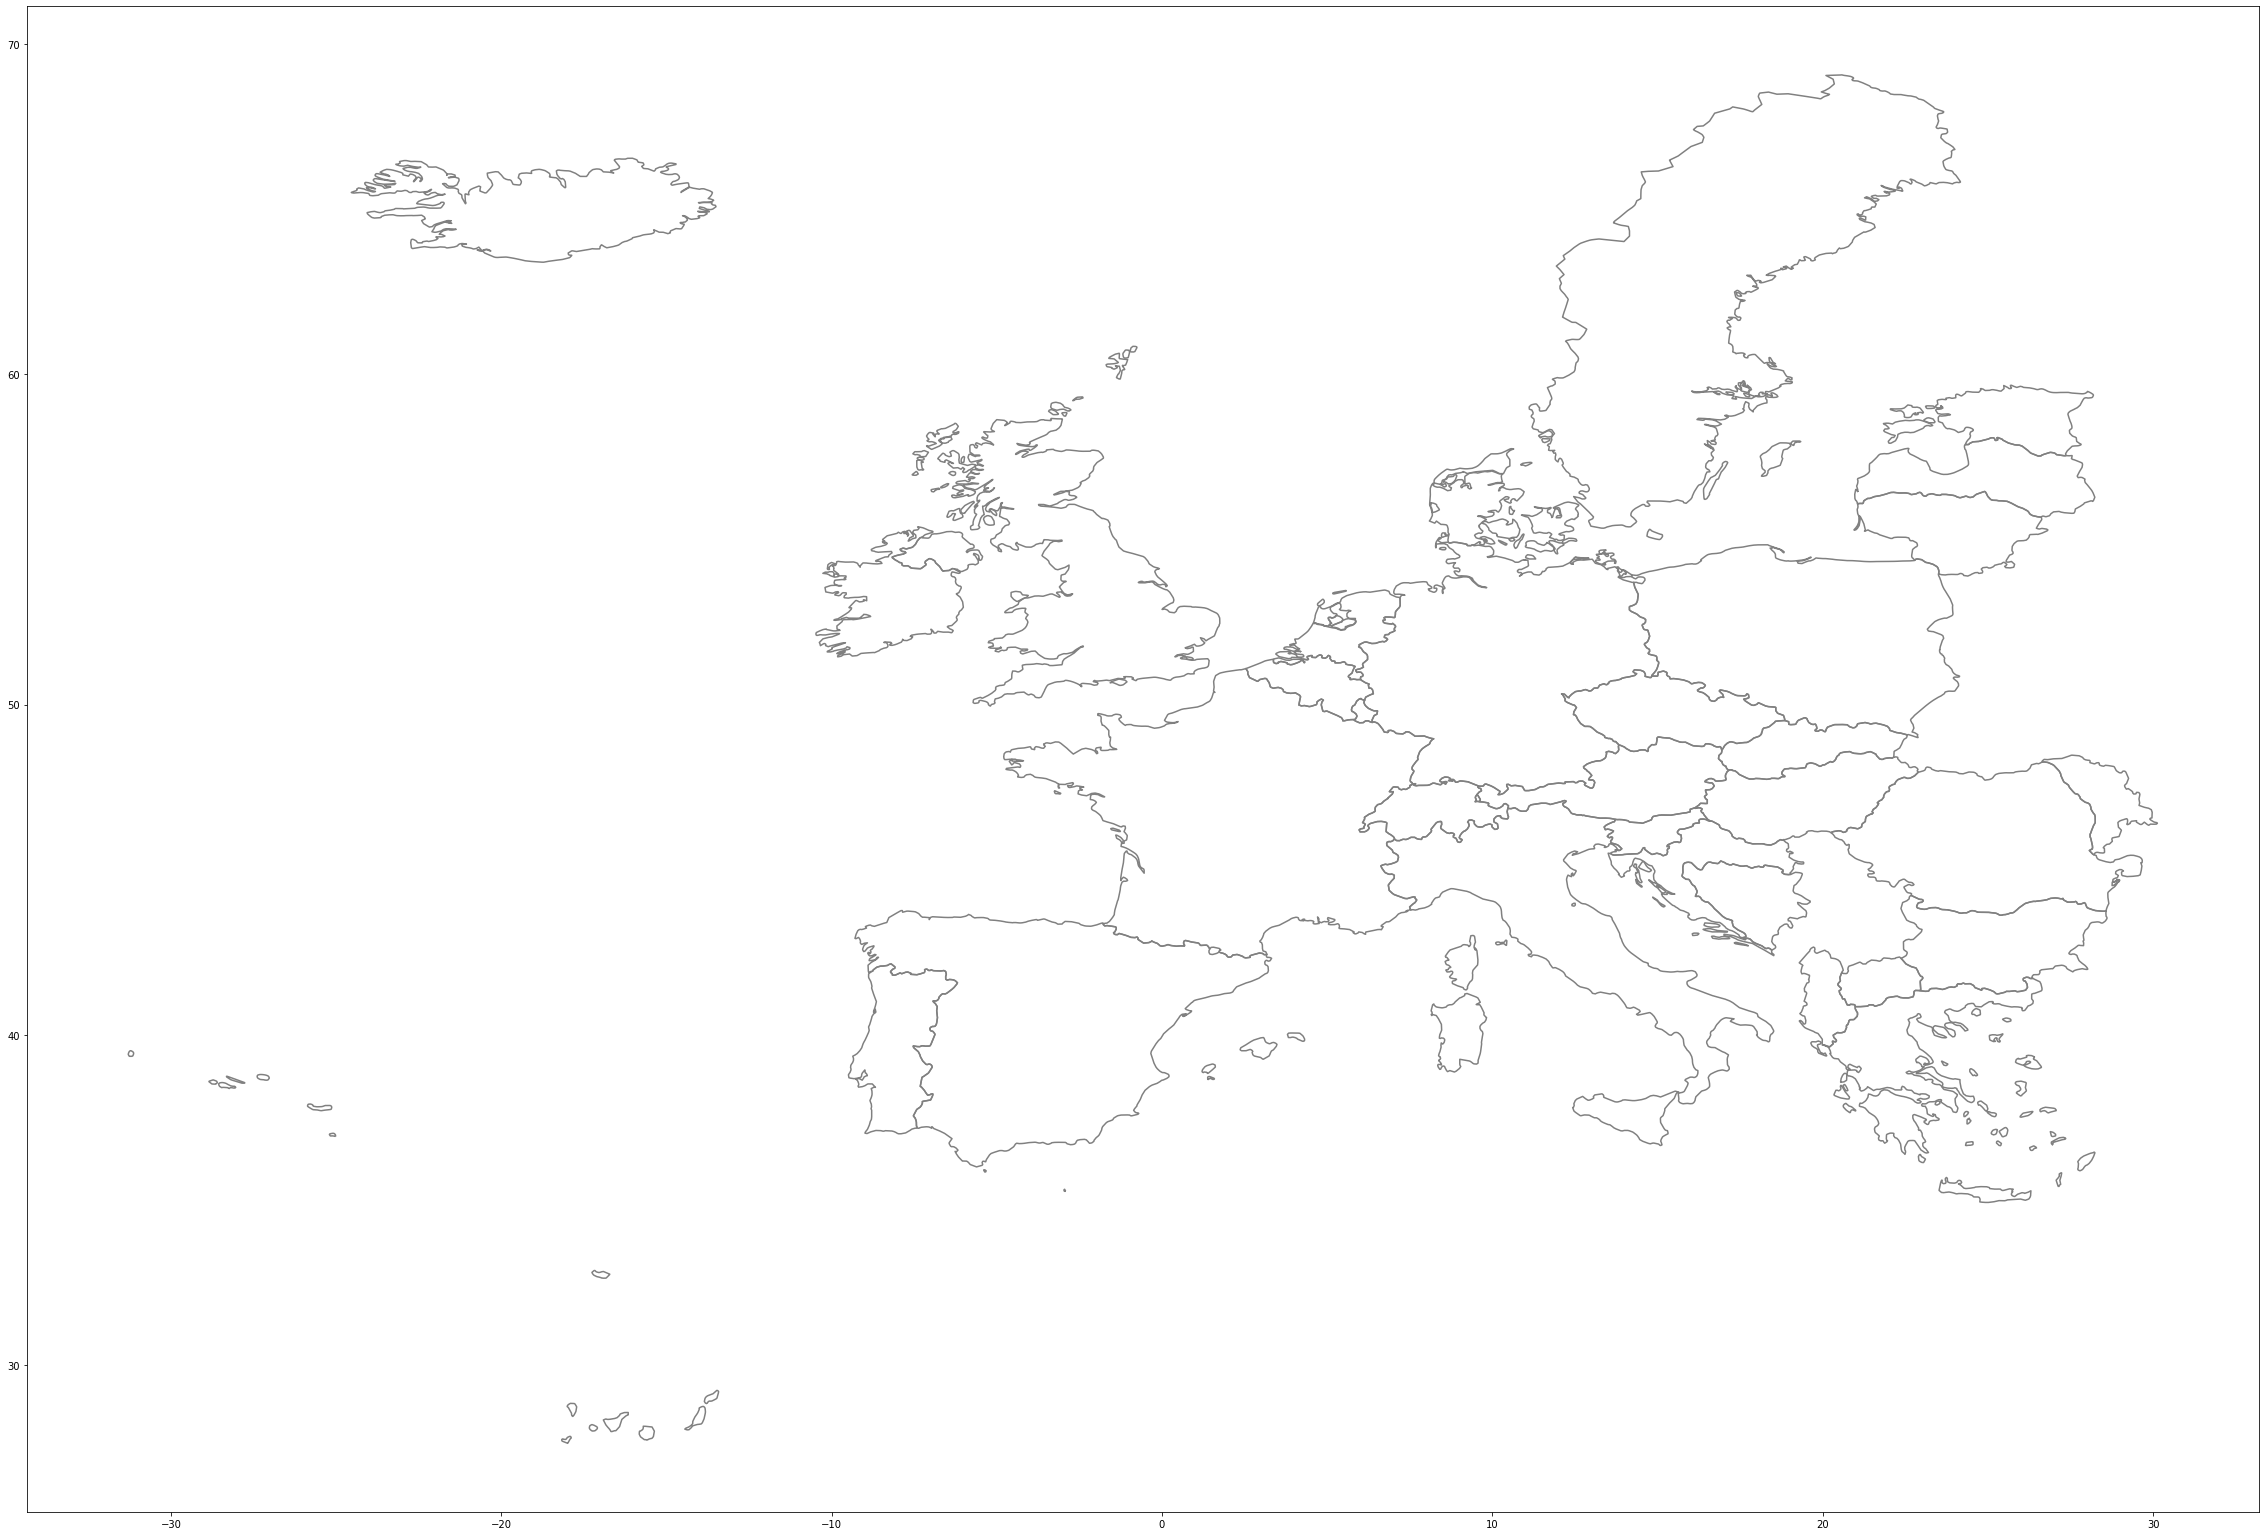

In [198]:
europe = gp.read_file('/Users/ryanswan/Downloads/europe')
europe.geometry.boundary.plot(color='gray', figsize=(40,40))

We can use our functions described above to make our chloropleth map...

In [215]:
euro_pts = filter_pts_by_boundary(geo_df, europe)
euro_pt_membership = assign_pt_to_region(euro_pts.artist.longitude, 
                                         euro_pts.artist.latitude, 
                                         europe,
                                         'CNTRY_NAME')
euro_chlor = add_chloro_column(euro_pt_membership, europe, 'CNTRY_NAME')

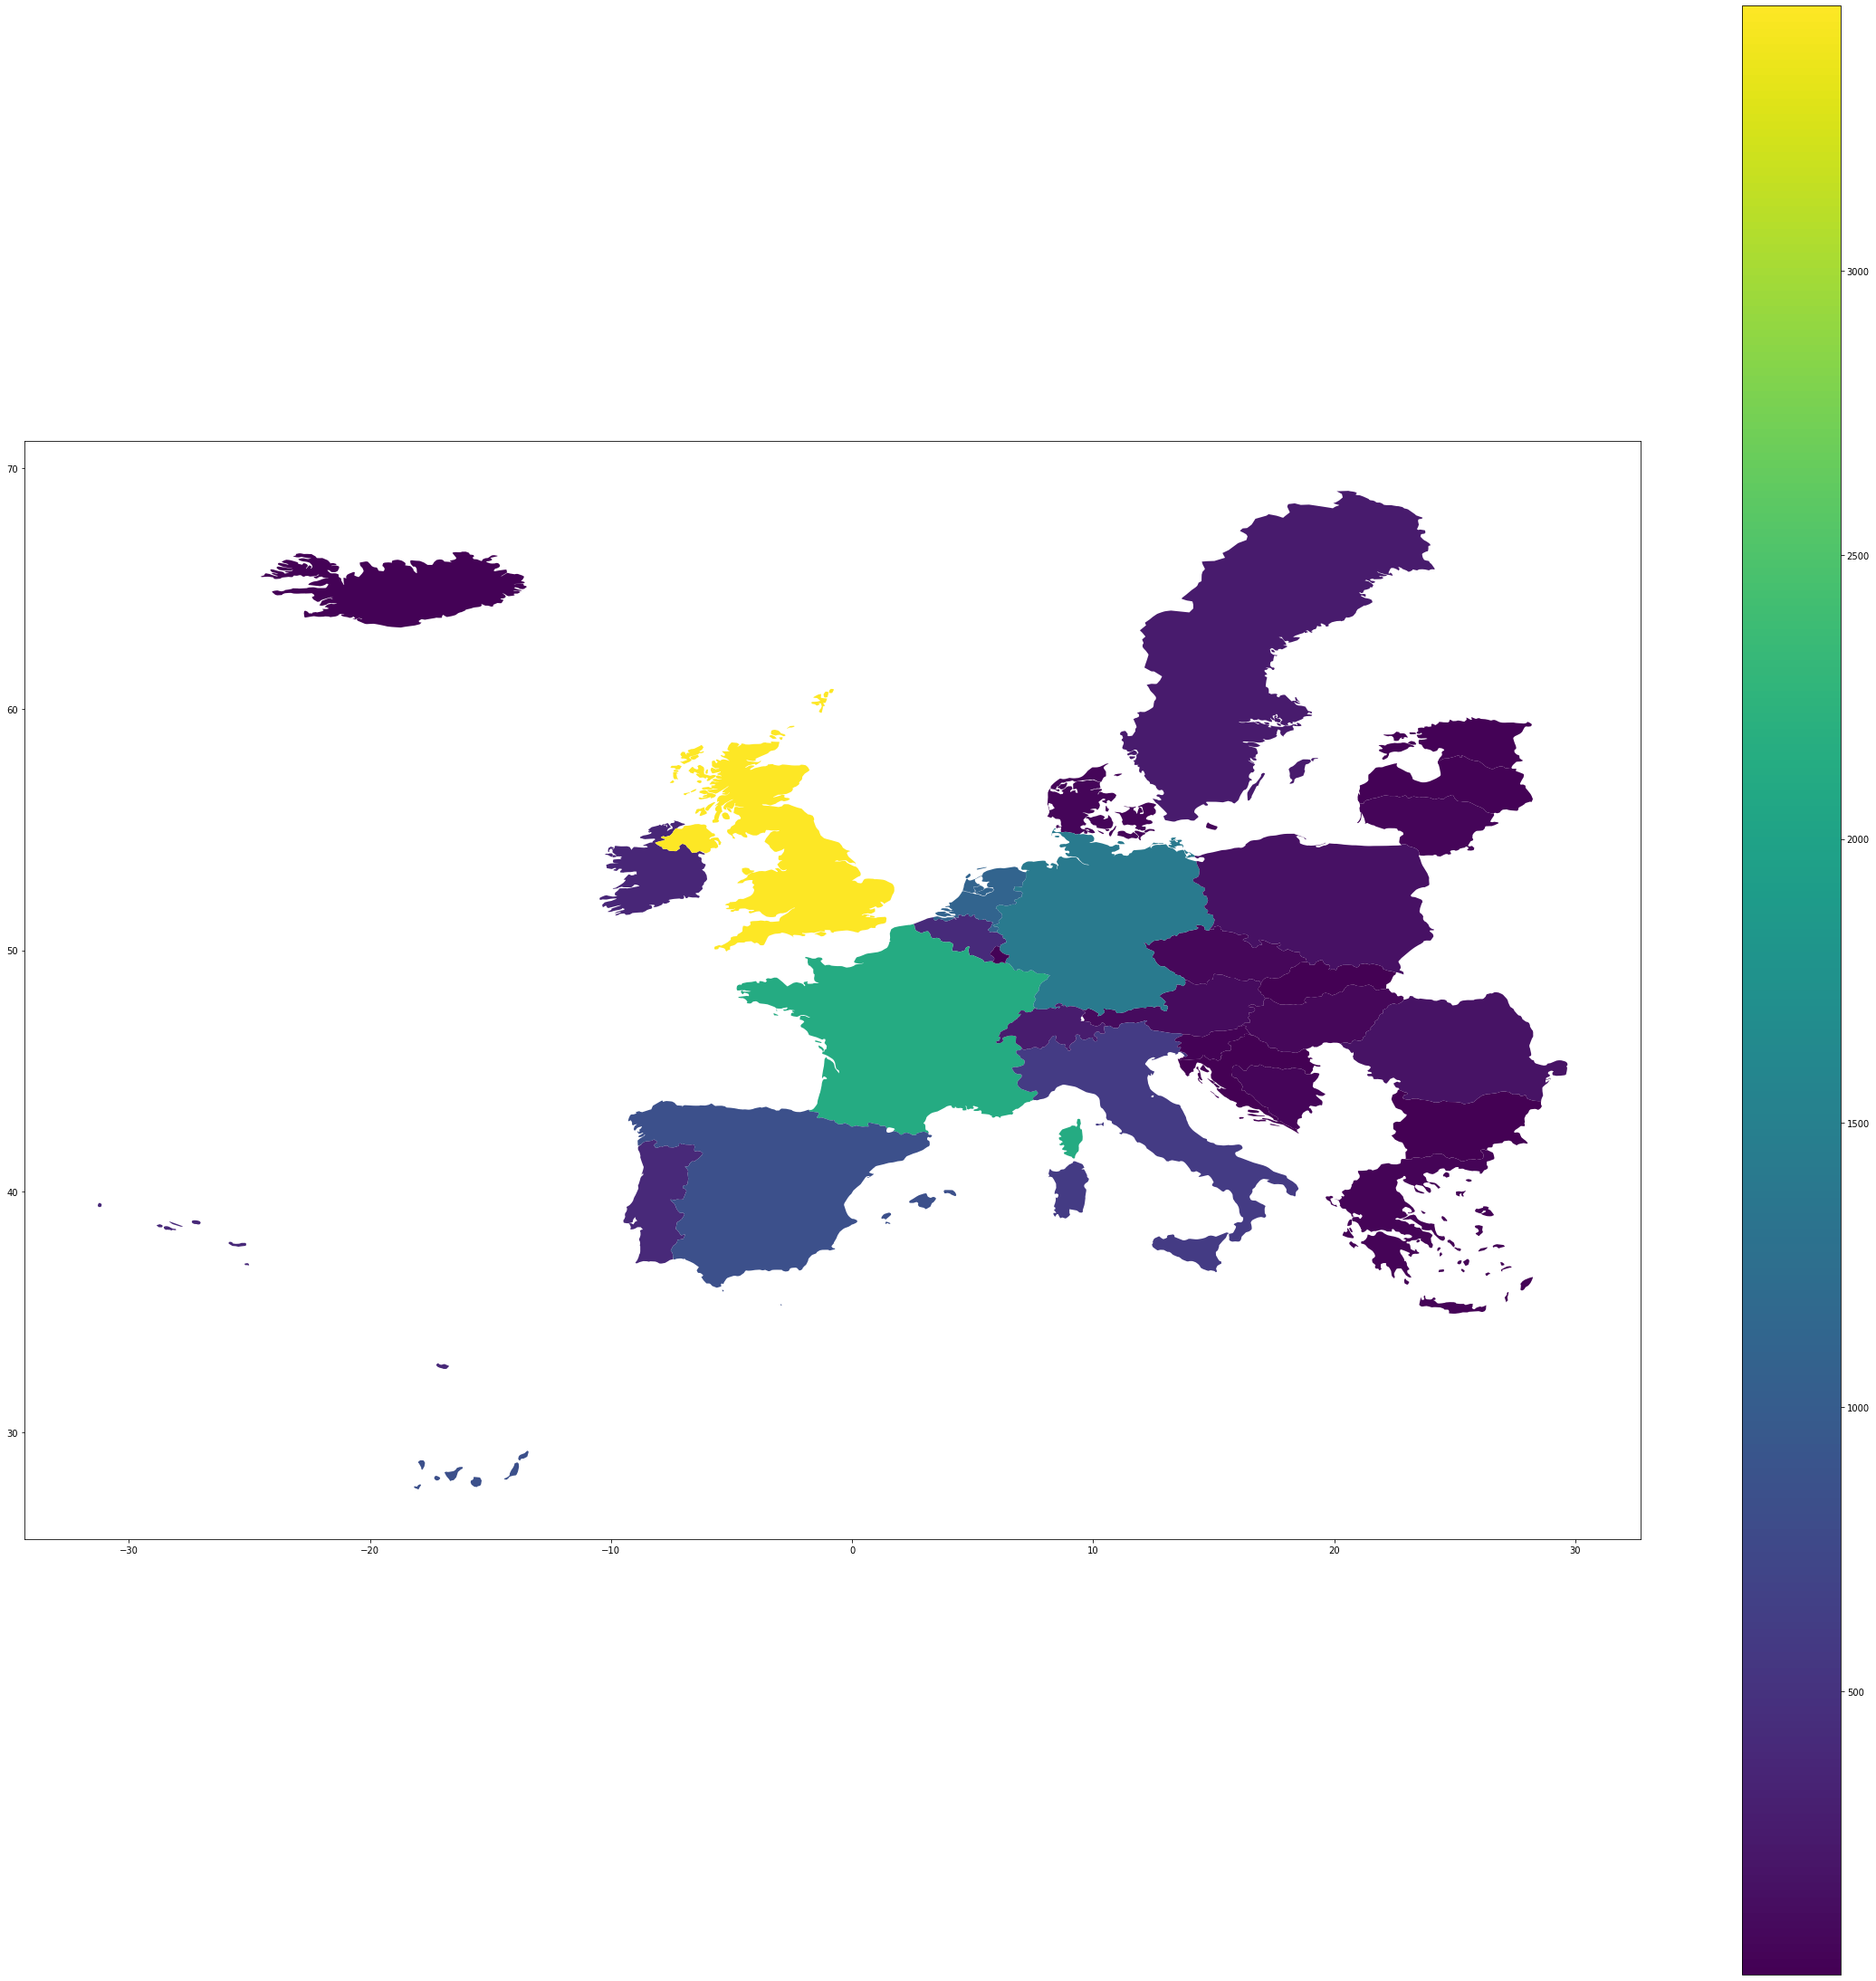

In [218]:
euro_chlor.plot(column='vals', legend=True, figsize=(40,40))

### Crosstab Comparisons

In [220]:
pd.crosstab(genre_tracks.region, genre_tracks.track.genre_top)

genre_top,Electronic,Experimental,Rock
region,,,
,5734,6720,6489
AFR,4,4,31
ASI,180,94,85
AUS,20,173,195
EUR,2048,1346,1306
NA,1332,2220,6009
SA,54,51,67


We can see that America has much more rock while Europe has much more electronic music.

In [221]:
pd.crosstab(genre_tracks.region, genre_tracks.track.genre_top, normalize='index')

genre_top,Electronic,Experimental,Rock
region,,,
,0.302698,0.354748,0.342554
AFR,0.102564,0.102564,0.794872
ASI,0.501393,0.261838,0.236769
AUS,0.051546,0.445876,0.502577
EUR,0.435745,0.286383,0.277872
NA,0.139316,0.232193,0.628491
SA,0.313953,0.296512,0.389535


MultiIndex([(   'album',          'comments'),
            (   'album',      'date_created'),
            (   'album',     'date_released'),
            (   'album',          'engineer'),
            (   'album',         'favorites'),
            (   'album',                'id'),
            (   'album',       'information'),
            (   'album',           'listens'),
            (   'album',          'producer'),
            (   'album',              'tags'),
            (   'album',             'title'),
            (   'album',            'tracks'),
            (   'album',              'type'),
            (  'artist', 'active_year_begin'),
            (  'artist',   'active_year_end'),
            (  'artist', 'associated_labels'),
            (  'artist',               'bio'),
            (  'artist',          'comments'),
            (  'artist',      'date_created'),
            (  'artist',         'favorites'),
            (  'artist',                'id'),
            (

In [222]:
tracks.columns

MultiIndex([(   'album',          'comments'),
            (   'album',      'date_created'),
            (   'album',     'date_released'),
            (   'album',          'engineer'),
            (   'album',         'favorites'),
            (   'album',                'id'),
            (   'album',       'information'),
            (   'album',           'listens'),
            (   'album',          'producer'),
            (   'album',              'tags'),
            (   'album',             'title'),
            (   'album',            'tracks'),
            (   'album',              'type'),
            (  'artist', 'active_year_begin'),
            (  'artist',   'active_year_end'),
            (  'artist', 'associated_labels'),
            (  'artist',               'bio'),
            (  'artist',          'comments'),
            (  'artist',      'date_created'),
            (  'artist',         'favorites'),
            (  'artist',                'id'),
            (